<a href="https://colab.research.google.com/github/kamini123576/BrazilFileDataset/blob/main/BrazilFireDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('amazon.csv',encoding ="iso-8859-1",parse_dates=['date'])

We are getting a decode error while loading our Dataset, also the datatype of Date column is in object we have to make it in DateTime Parameter.

In [6]:
data.dtypes

,0
year,int64
state,object
month,object
number,float64
date,datetime64[ns]


1. Display the Top 5 Dataset

In [9]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


2. Display the last 5 Rows of the Dataset

In [10]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


3. Find the Shape of our Dataset

In [11]:
data.shape

(6454, 5)

In [12]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 6454
Number of Columns 5


4. Getting the information about our Dataset (Rows, columns, Datatypes, Memory)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


5. Check for Duplicate Data and remove them

In [16]:
dup_data = data.duplicated().any()
print("Are there any duplicated data in dataset",dup_data)

Are there any duplicated data in dataset True


In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(6422, 5)

In [20]:
print("Total Duplicates found in the dataset",6454-6422)

Total Duplicates found in the dataset 32


6. Check the Null Values in the Dataset

In [21]:
data.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


7. Get the overall Statistics about the Dataset

In [23]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


7. Rename Month Names to English

In [26]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [29]:
data['month_new'] = data['month'].map({ 'Janeiro' : 'Jan',
                                      'Fevereiro' : 'Feb',
                                       'Marco': 'Mar',
                                       'Abril' : 'Apr',
                                       'Maio' : 'May',
                                       'Junho': 'Jun',
                                       'Julho' : 'Jul',
                                       'Agosto' : 'Aug',
                                       'Setembro' : 'Sep',
                                       'Outubro' : 'Oct',
                                       'Novembro' : 'Nov',
                                       'Dezembro' : 'Dec'})


In [30]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


9. Total Number of Fires Registered

In [33]:
data.shape

(6422, 6)

10. In which Month Maximum Number of Fires Reported

In [56]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,May,34725.363
8,Nov,85508.054
9,Oct,88681.579


<ipython-input-61-44b3c11c0f32>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_new',y='number',data=data1, palette = 'Set2')


<Axes: xlabel='month_new', ylabel='number'>

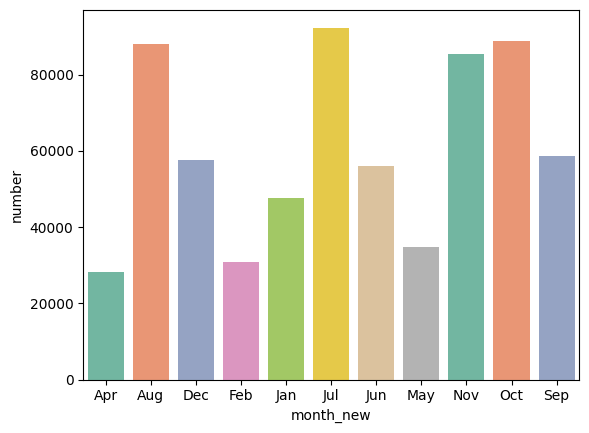

In [61]:
sns.barplot(x='month_new',y='number',data=data1, palette = 'Set2')

11. In which Year Maximum Number of Forest Fires Were Reported?

In [64]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<ipython-input-71-28d2860fa546>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'year', y= 'number',data = data2,palette = 'Set2')


<Axes: xlabel='year', ylabel='number'>

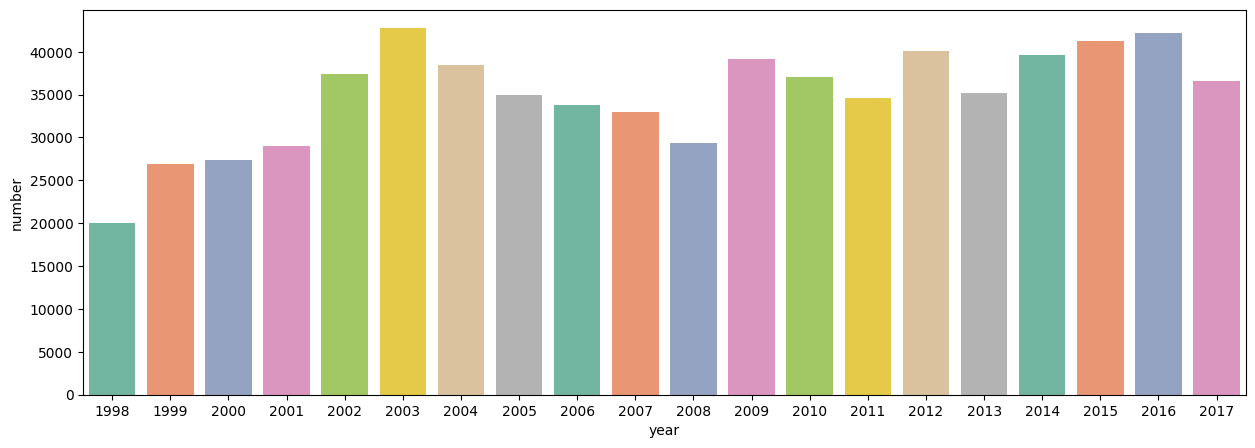

In [71]:
plt.figure(figsize =(15,5))
sns.barplot(x= 'year', y= 'number',data = data2,palette = 'Set2')

12. In Which State Maximum Number of Forest Fires were Reported?

In [75]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<ipython-input-78-ab393ce4849f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='state',y= 'number',data=data3,palette = 'Set1')


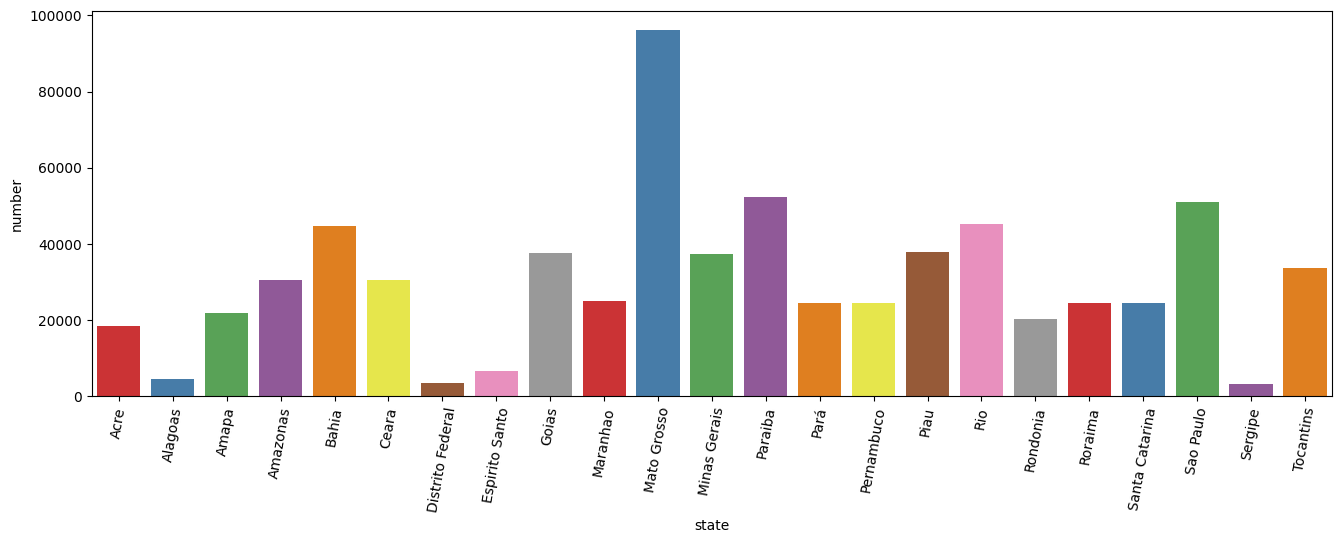

In [78]:
plt.figure(figsize =(16,5))
sns.barplot(x ='state',y= 'number',data=data3,palette = 'Set1')
plt.xticks(rotation =80)
plt.show()

13. Find Total Number of Fires were Reported in Amazonas?

In [80]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [85]:
data[data['state'] =='Amazonas']['number'].sum()

30650.129

14. Display the number of Fires were Reported in Amazonas (Year - Wise)

In [86]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [93]:
data4 = data[data['state'] =='Amazonas'].groupby('year')['number'].sum().reset_index()
data4

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<ipython-input-95-aff6dfde91c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year',y='number',data=data4,palette ='Set1')


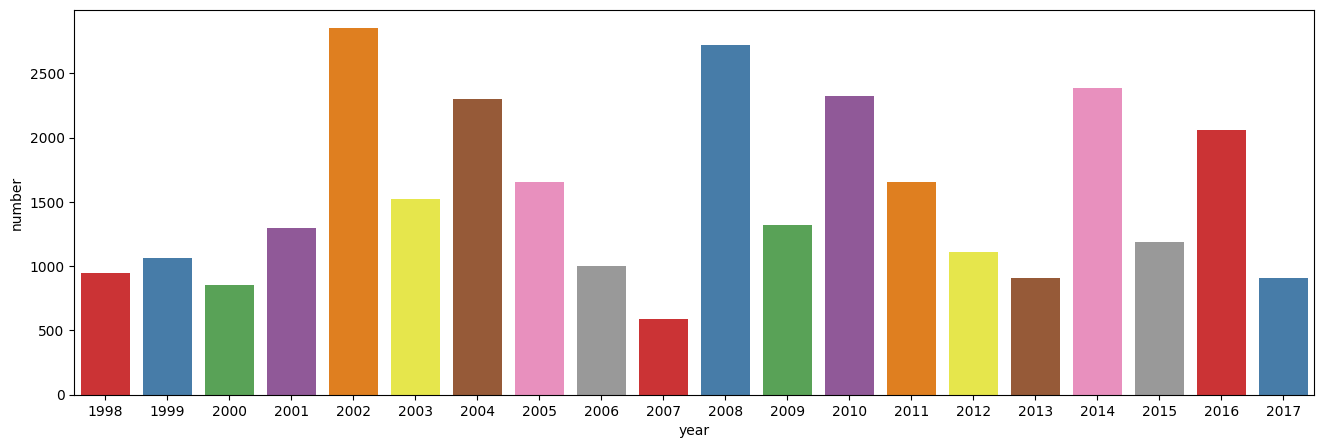

In [95]:
plt.figure(figsize =(16,5))
sns.barplot(x='year',y='number',data=data4,palette ='Set1')
plt.show()

15. Display Number of Fires Were Reported in Amazonas (Day-Wise)

In [104]:
data5 =data[data['state'] == 'Amazonas']
day = data5.groupby(data5['date'].dt.dayofweek)['number'].sum()

In [107]:
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<ipython-input-109-a02fcbe240de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index',y='number',data=day,palette='Set2')


<Axes: xlabel='index', ylabel='number'>

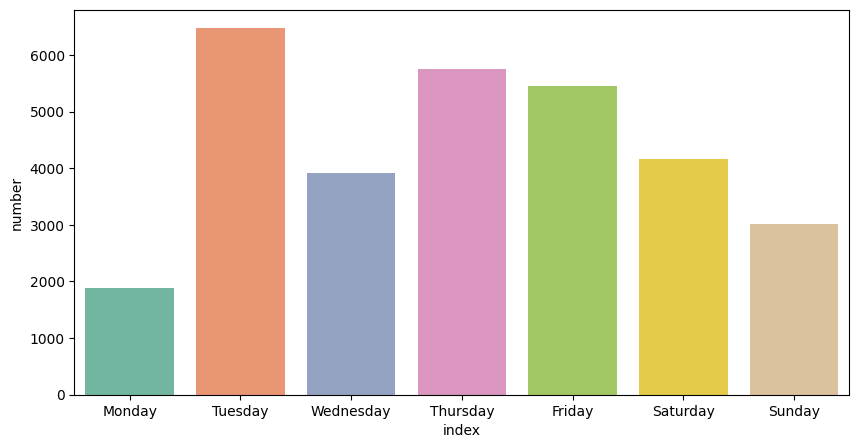

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x='index',y='number',data=day,palette='Set2')

16. Find the total Number of Fires were reported in 2015 And visualize Data based on Each Month

In [116]:
month_fire =  data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()
month_fire

,month_new,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,May,34725.363
8,Nov,85508.054
9,Oct,88681.579


<ipython-input-119-93a5ddf3d838>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_new',y='number',data=month_fire,palette = 'Set1')


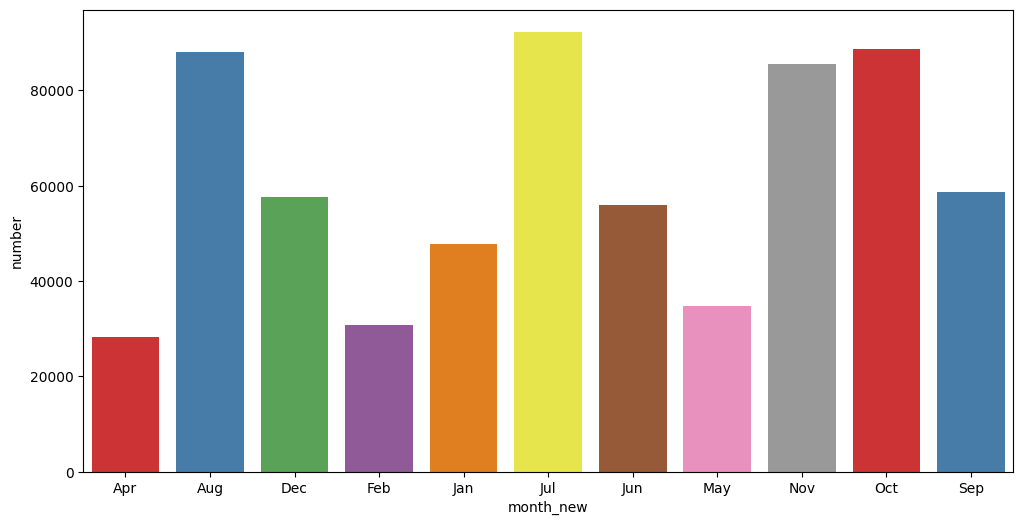

In [119]:
plt.figure(figsize = (12,6))
sns.barplot(x='month_new',y='number',data=month_fire,palette = 'Set1')
plt.show()

17. Find the Average Number of Fires were Reported from Highest to Lowest (State - Wise)

In [120]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [125]:
data6 = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
data6

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<ipython-input-130-ceccdd19d894>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state',y='number',data=data6,palette='Set2')


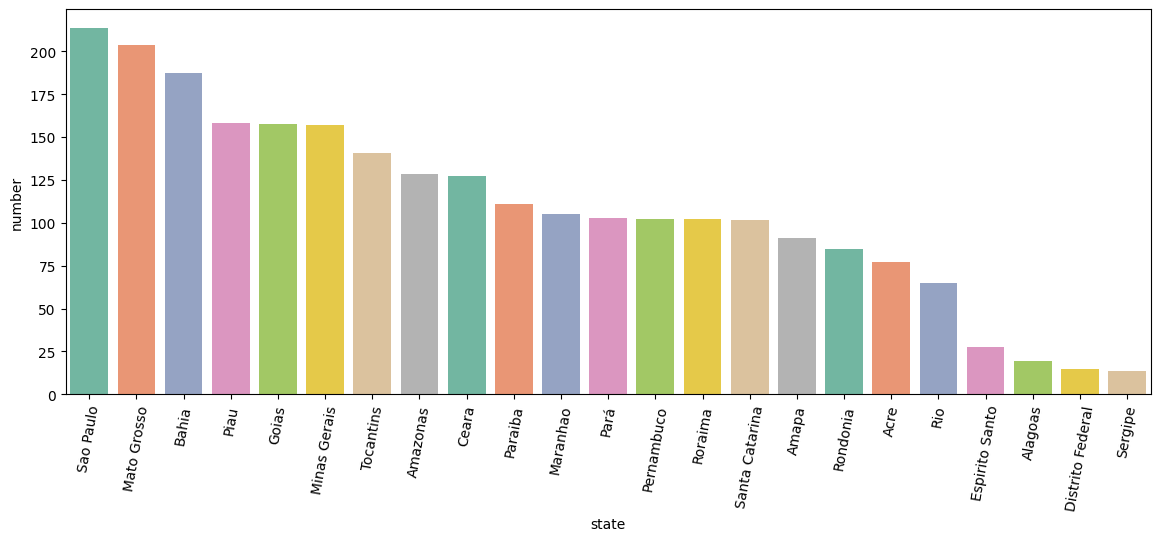

In [130]:
plt.figure(figsize =(14,5))
sns.barplot(x='state',y='number',data=data6,palette='Set2')
plt.xticks(rotation =80)
plt.show()

18. To find the State Names Where Fires were Reported in 'Dec' Month

In [131]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [136]:
data[data['month_new'] == 'Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)